In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import kagglehub

In [2]:
# Base de dados
path = kagglehub.dataset_download("ajinilpatel/energy-consumption-prediction")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

100%|██████████| 240k/240k [00:00<00:00, 46.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ajinilpatel/energy-consumption-prediction/versions/1


['Energy_consumption_dataset.csv']

In [3]:
path = '/root/.cache/kagglehub/datasets/ajinilpatel/energy-consumption-prediction/versions/1'
df_path = pd.read_csv(path + '/Energy_consumption_dataset.csv')
df_path.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [4]:
num_linhas = df_path.shape[0]
print(f"O dataset possui {num_linhas} linhas.")

O dataset possui 5000 linhas.


In [5]:
df_path.isnull().sum()

,0
Month,0
Hour,0
DayOfWeek,0
Holiday,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0


In [9]:
df_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


##Consumo Mensal:

In [39]:
# Agrupando os dados por mês e somando o consumo de energia
consumo_mensal = df_path.groupby('Month')['EnergyConsumption'].sum()

# Ordenando os meses pelo maior consumo de energia
consumo_mensal_sorted = consumo_mensal.sort_values(ascending=False)

# Exibindo os resultados
print(consumo_mensal_sorted)

Month
1     57247.160730
4     31034.394942
11    30936.782574
7     30900.515678
12    30851.173956
3     30796.374996
10    30671.422452
8     30624.322678
5     30480.904171
9     30359.124472
6     30263.705685
2     19808.712138
Name: EnergyConsumption, dtype: float64


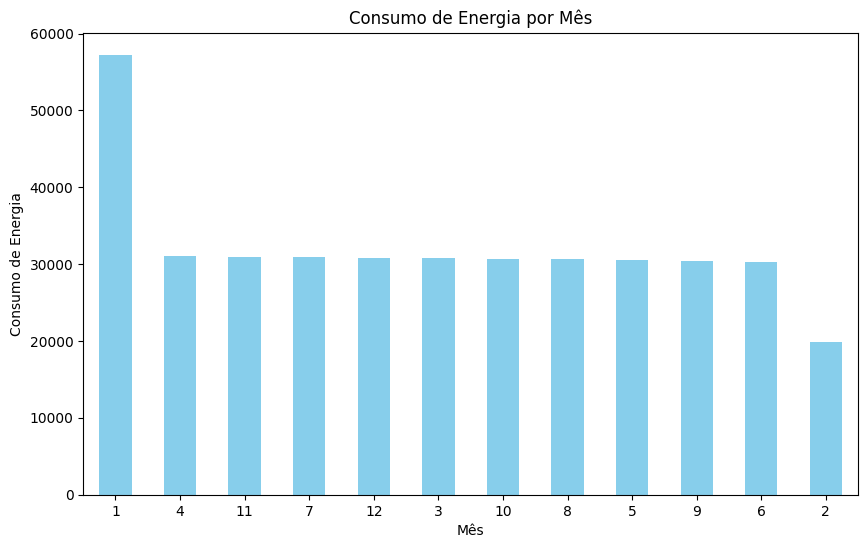

In [40]:
# Gráfico de barras do consumo de energia por mês
plt.figure(figsize=(10, 6))
consumo_mensal_sorted.plot(kind='bar', color='skyblue')
plt.title('Consumo de Energia por Mês')
plt.xlabel('Mês')
plt.ylabel('Consumo de Energia')
plt.xticks(rotation=0)
plt.show()

## Consumo por hora

In [26]:
# Agrupando os dados por hora e somando o consumo de energia
consumo_hora = df_path.groupby('Hour')['EnergyConsumption'].sum()

# Ordenando os meses pelo maior consumo de energia
consumo_hora_sorted = consumo_hora.sort_values(ascending=False)

# Exibindo os resultados
print(consumo_hora_sorted)

Hour
5     17581.307348
9     17373.110861
18    17018.738407
19    16961.549540
22    16851.534131
14    16820.973382
10    16795.930852
7     16701.408910
13    16438.340356
11    16397.511686
23    16364.749977
1     15979.137248
6     15915.127438
2     15760.047428
3     15741.471127
4     15722.390855
20    15392.390587
16    15346.089962
17    15337.726504
21    15160.365711
12    15019.876881
8     14774.845342
15    14280.667146
0     14239.302793
Name: EnergyConsumption, dtype: float64


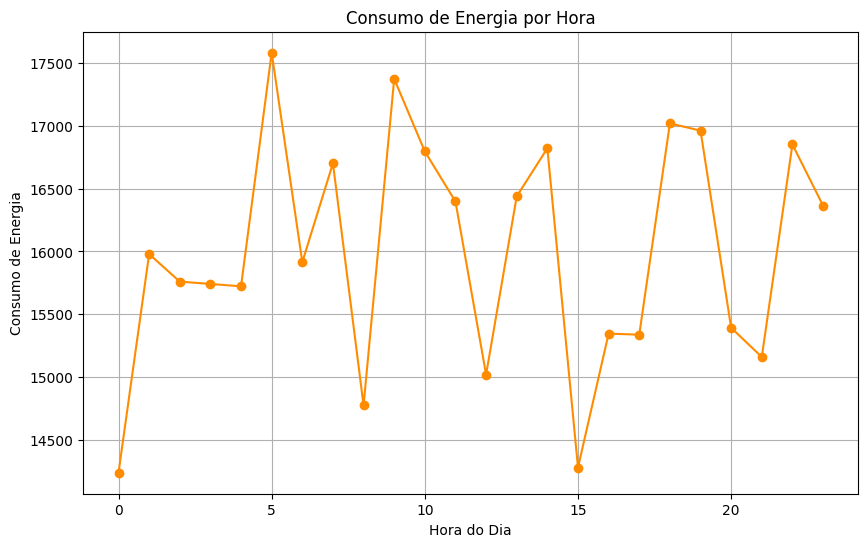

In [31]:
plt.figure(figsize=(10, 6))
consumo_hora.plot(kind='line', color='darkorange', marker='o')
plt.title('Consumo de Energia por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo de Energia')
plt.grid(True)
plt.show()

##Consumo por temperatura:


In [46]:
# Agrupando os dados por temperatura e somando o consumo de energia
consumo_por_temperatura = df_path.groupby('Temperature')['EnergyConsumption'].sum()

# Ordenando os dados pelo maior consumo de energia (de forma crescente ou decrescente)
consumo_por_temperatura_sorted = consumo_por_temperatura.sort_values(ascending=False)

# Exibindo os resultados
print(consumo_por_temperatura_sorted)


Temperature
29.998671    25957.429276
20.007565    19562.894501
25.710427       99.201120
28.498607       99.201120
24.818577       99.201120
                 ...     
25.019816       53.263278
20.461534       53.263278
21.956918       53.263278
21.400221       53.263278
20.880428       53.263278
Name: EnergyConsumption, Length: 4409, dtype: float64


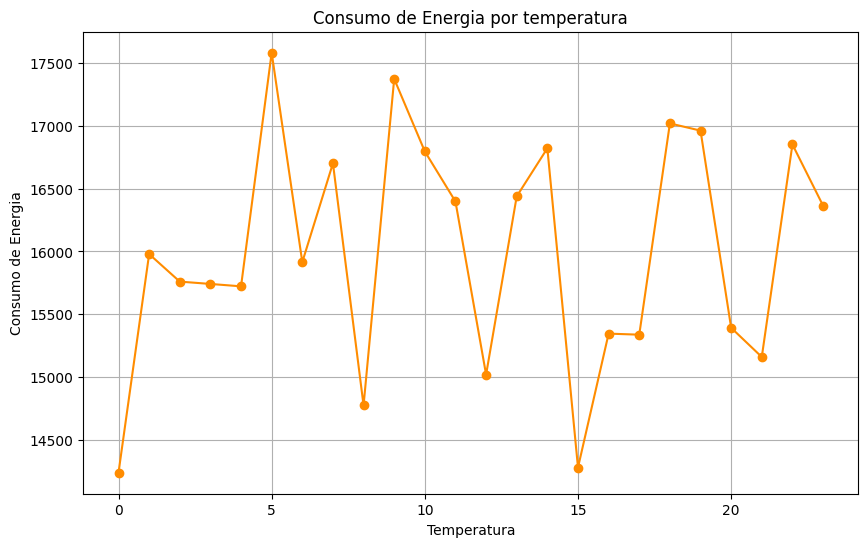

In [53]:
plt.figure(figsize=(10, 6))
consumo_hora.plot(kind='line', color='darkorange', marker='o')
plt.title('Consumo de Energia por temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Consumo de Energia')
plt.grid(True)
plt.show()

Possível relação entre a temperatura e o consumo de energia, vou tentar fazer alguma previsão usando ML.

In [48]:
correlacao = df_path[['Temperature', 'EnergyConsumption']].corr()
print(correlacao)

                   Temperature  EnergyConsumption
Temperature           1.000000           0.535338
EnergyConsumption     0.535338           1.000000


A correlação entre Temperatura e Consumo de Energia é de 0.535338, o que indica uma correlação moderada positiva entre essas duas variáveis. Isso sugere que, de maneira geral, à medida que a temperatura aumenta, o consumo de energia tende a aumentar também, mas essa relação não é extremamente forte.


##Consumo de energia por dia da semana:

In [62]:
print(df_path.columns)

Index(['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'RenewableEnergy', 'EnergyConsumption', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'Holiday_No', 'Holiday_Yes', 'HVACUsage_Off', 'HVACUsage_On',
       'LightingUsage_Off', 'LightingUsage_On'],
      dtype='object')


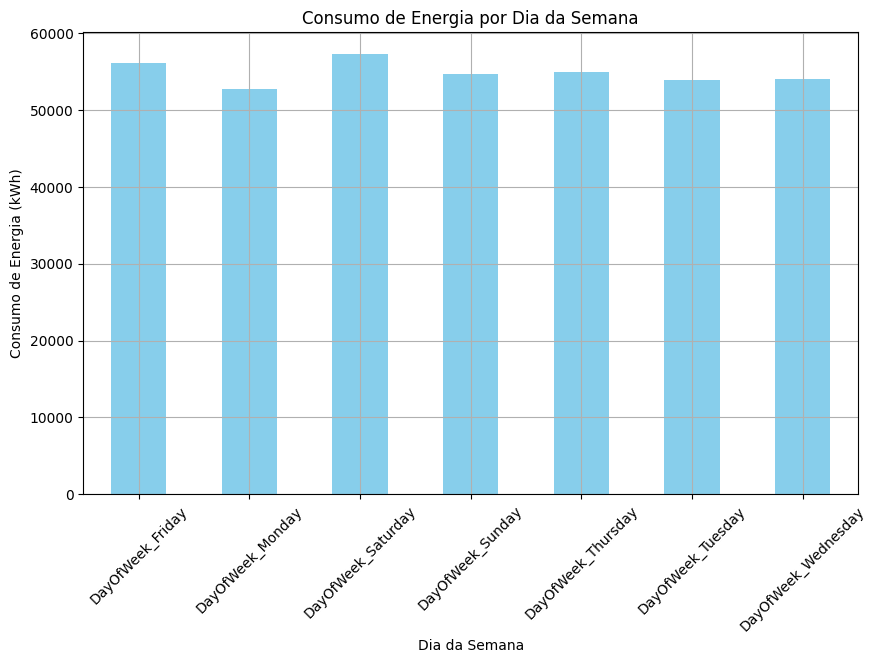

In [66]:
# Criando uma nova coluna 'DayOfWeek' baseada nas colunas binárias
df_path['DayOfWeek'] = df_path[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
                                 'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday',
                                 'DayOfWeek_Sunday']].idxmax(axis=1)

# Agora, agrupamos o consumo de energia por dia da semana
consumo_por_dia = df_path.groupby('DayOfWeek')['EnergyConsumption'].sum()


# Plotando o gráfico
plt.figure(figsize=(10, 6))
consumo_por_dia.plot(kind='bar', color='skyblue')
plt.title('Consumo de Energia por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Consumo de Energia (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##Correlacionando as variáveis numericas:
Uma análise de correlação entre as variáveis pode ser útil para identificar relações importantes, especialmente entre variáveis numéricas. Isso pode indicar quais fatores mais afetam o consumo de energia.
Isso ajudará a identificar quais variáveis estão mais correlacionadas com o consumo de energia.



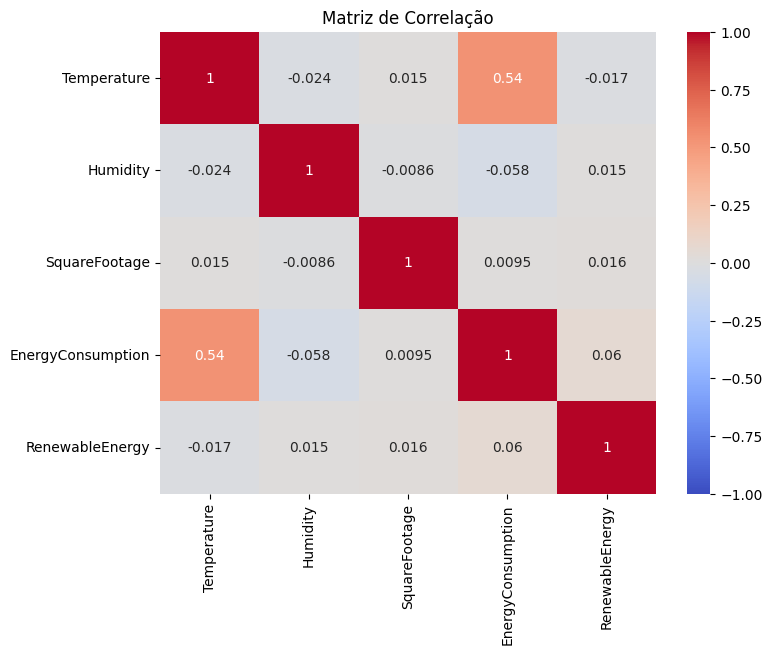

In [68]:
# Calculando a correlação entre as variáveis numéricas
correlacao = df_path[['Temperature', 'Humidity', 'SquareFootage', 'EnergyConsumption', 'RenewableEnergy']].corr()

# Plotando o gráfico de calor da correlação
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


Interpretação de um Mapa de Calor de Correlação:

**Matriz de Correlação:** A matriz de correlação exibe os coeficientes de correlação entre cada par de variáveis numéricas. A correlação é um número entre -1 e 1, onde:

*   +1 significa uma correlação positiva perfeita, quando uma variável aumenta, a outra também aumenta.
*   -1 significa uma correlação negativa perfeita: quando uma variável aumenta, a outra diminui.
*   0 significa nenhuma correlação linear entre as variáveis.

**No Mapa de Calor:**

As células da matriz representam o valor da correlação entre as variáveis.
O valor em cada célula varia de -1 a 1, com cores representando diferentes intensidades de correlação.
Cores mais escuras (mais azuis ou mais vermelhas) indicam uma correlação mais forte (positiva ou negativa).
Cores mais claras indicam uma correlação mais fraca, mais próxima de 0.
